In [20]:
#Prueba CNV Construcciones
#Importar Librerías
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
#Leer la Base de Datos 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [10]:
#Cantidad de Registros Por Base Train
train.shape
#La base de entrenamiento tiene 200.000 registros con 202 columnas

(200000, 202)

In [9]:
#Cantidad de Registros por Base Test
test.shape
#La base de test tiene 200.000 registros por 201 columnas, ya que aquí no hay la variable de la categoría

(200000, 201)

In [11]:
#Ejemplo de los primeros 5 datos de la base de train
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [12]:
#Ejemplo de los primeros 5 datos de la base de test
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [20]:
#Ambas bases poseen 200 variables numericas, y una variable string llamada ID_codey la base train contiene una variable
#adicional llamada target que es lo que deseamos predecir.
#Vamos a definir una funcion para identificar datos faltantes 
def datos_faltantes(data):
    totales = data.isnull().sum()
    porcentaje = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([totales, porcentaje], axis=1, keys=['Totales', 'Porcentaje'])
    tipo = []
    for col in data.columns:
        dtipo = str(data[col].dtype)
        tipo.append(dtipo)
    tt['Tipos'] = tipo
    return(np.transpose(tt))

In [21]:
#Aplicar la función a los datos de entrenamiento
datos_faltantes(train)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Totales,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Porcentaje,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tipos,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [22]:
#Aplicar la función a los datos del test
datos_faltantes(test)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Totales,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Porcentaje,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tipos,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [23]:
#Nos damos cuenta que no existen datos faltantes ninguna de las dos bases, vamos a realizar un analisis descriptivos
#de la base de entrenamiento y de prueba
#Descriptivos de Base de Entrenamiento
train.describe()


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [24]:
#Descriptivos de la Base de Test
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


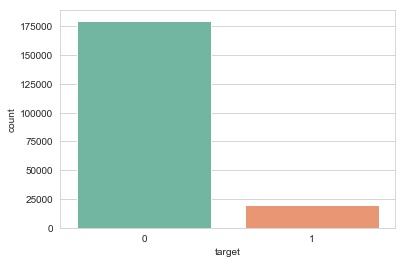

In [36]:
#Los valores en las variables tanto de prueba y de train son muy parecidos y es positivo para la predicción, en toda
#la distribucion min, max, media y desvacion. 
#Analizamos la cantidad de proporciones de la variable target
#Importar librería
import seaborn as sns 
sns.countplot(train['target'], palette='Set2')

In [28]:
print("El porcentaje es {}% de la variable target con valor 1".format(100 * train["target"].value_counts()[1]/train.shape[0]))

El porcentaje es 10.049% de la variable target con valor 1


In [29]:
#Por lo tanto la base se encuentra desbalanceada

In [42]:
#Ahora se va utilizar la distribucio de la frecuencia por target, para identificar en que variable se comportan
#distintos ya que esto da pie para saber que variables son importantes en la predicción. Definimos funcion de plot
import matplotlib.pyplot as plt
def distribucion(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1,color="k")
        sns.distplot(df2[feature], hist=False,label=label2,color="g")
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();


<Figure size 432x288 with 0 Axes>

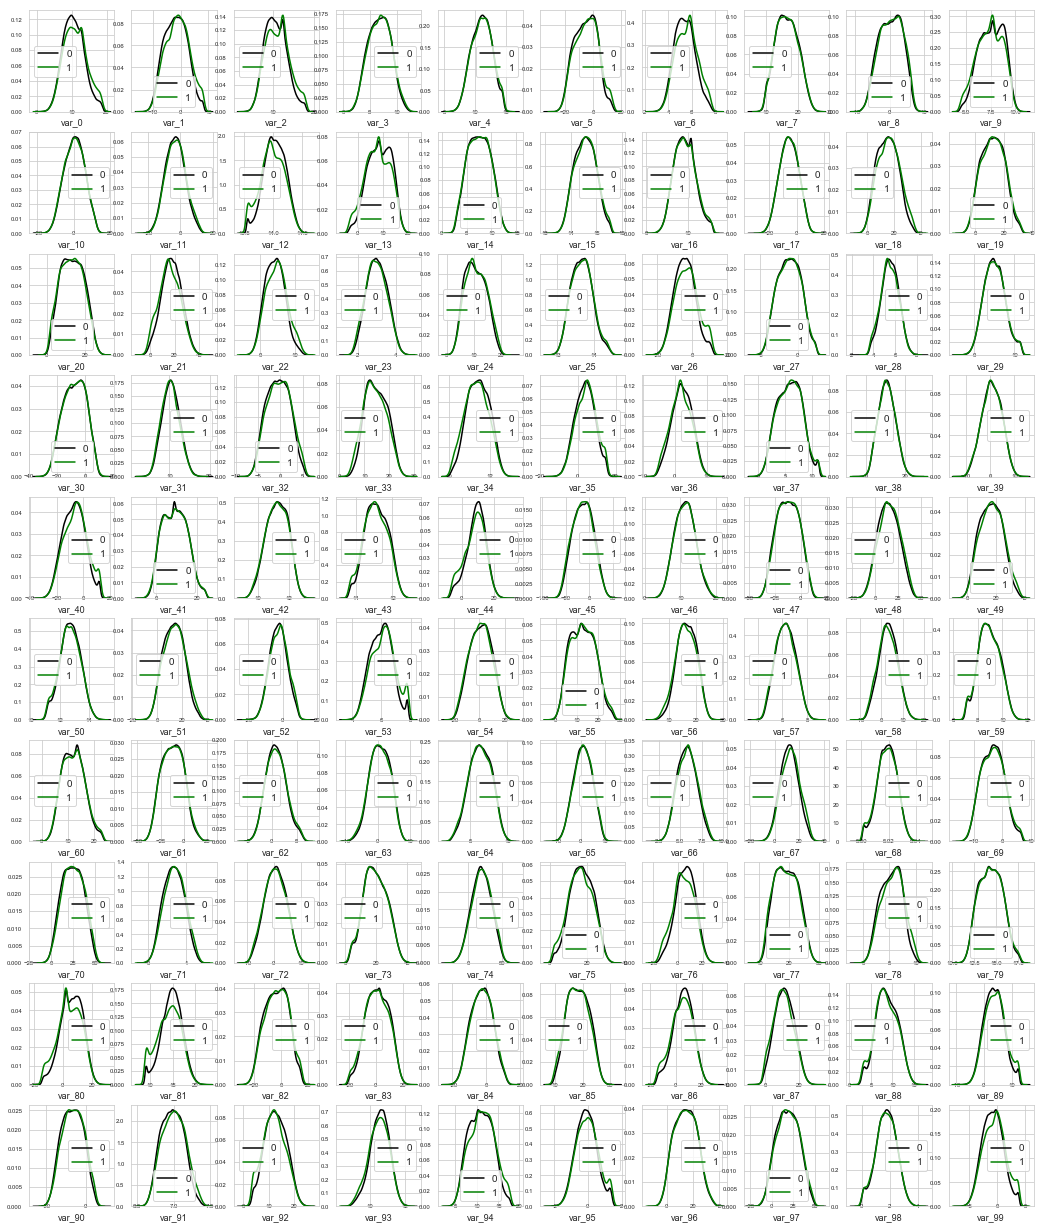

In [44]:
#Primeras cien variables numericas
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
variables = train.columns.values[2:102]
distribucion(t0, t1, '0', '1', variables)

<Figure size 432x288 with 0 Axes>

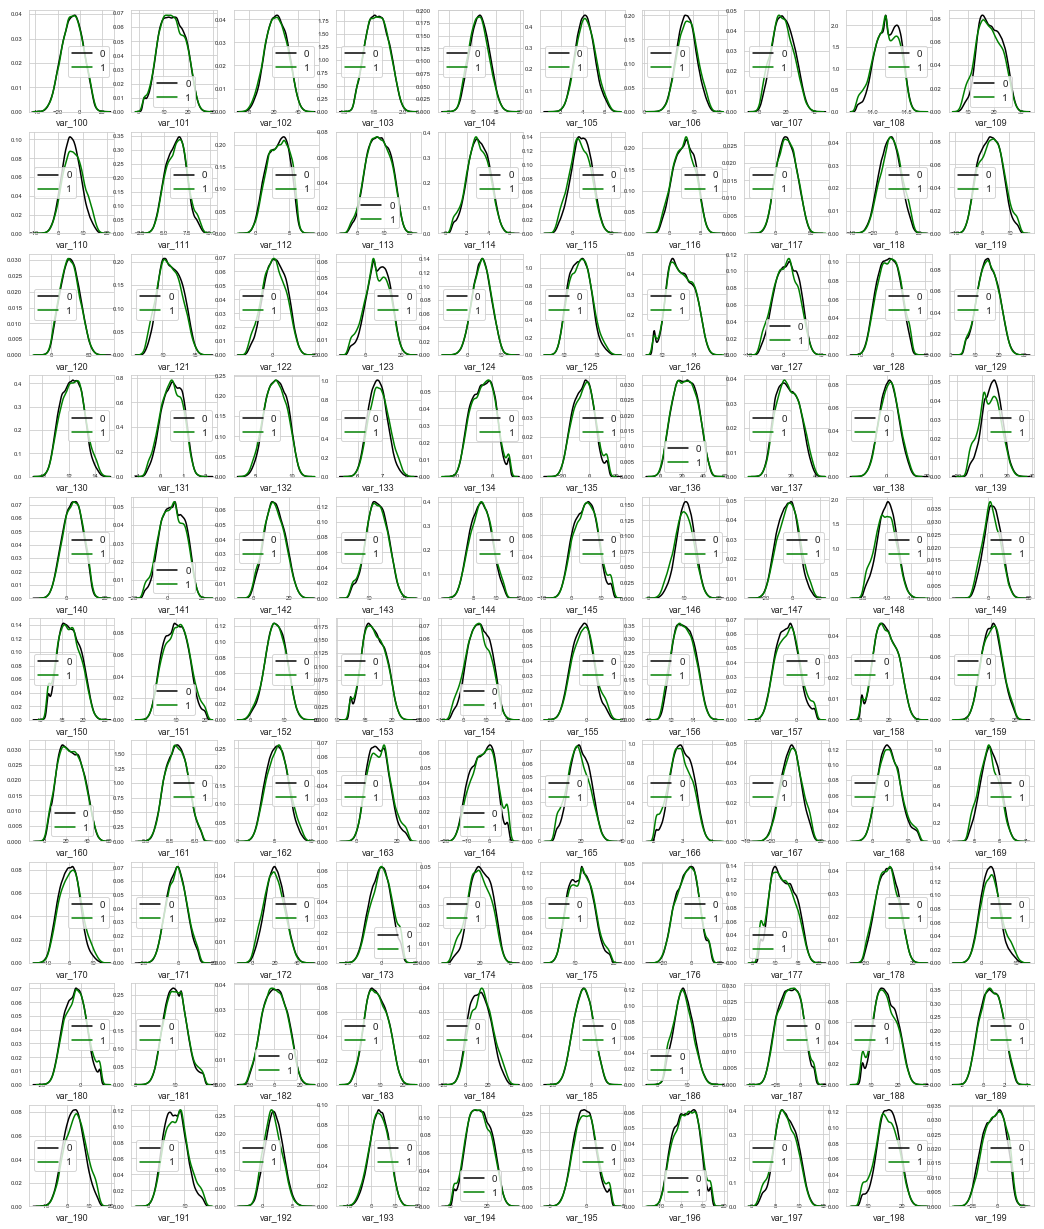

In [45]:
#Siguientes 100 variables numericas
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
variables = train.columns.values[102:202]
distribucion(t0, t1, '0', '1', variables)

In [ ]:
#Al mirar las variables se observa que hay unas en donde su distribucion es diferente respecto al target como 
#variable0, variable1, variable2, variable5, variable6, variable9, variable12, variable13 entre otras, que dan indicios
#que sean importantes en la prediccion
#Ahora analizaremos no target sino bases de prueba y de test para ver si sus comportamientos son distintos

<Figure size 432x288 with 0 Axes>

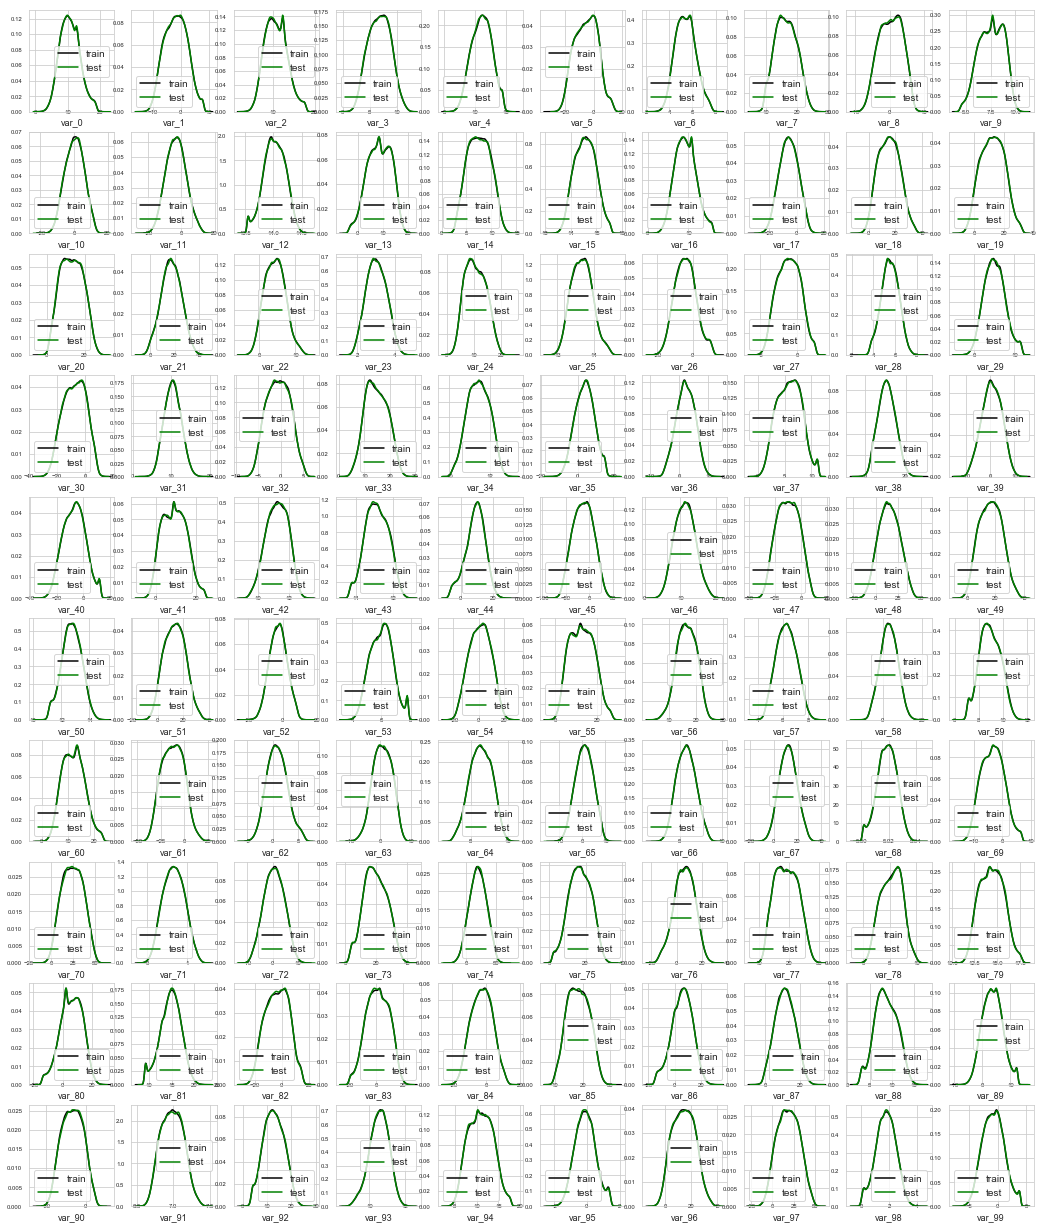

In [47]:
variables = train.columns.values[2:102]
distribucion(train, test, 'train', 'test', variables)

<Figure size 432x288 with 0 Axes>

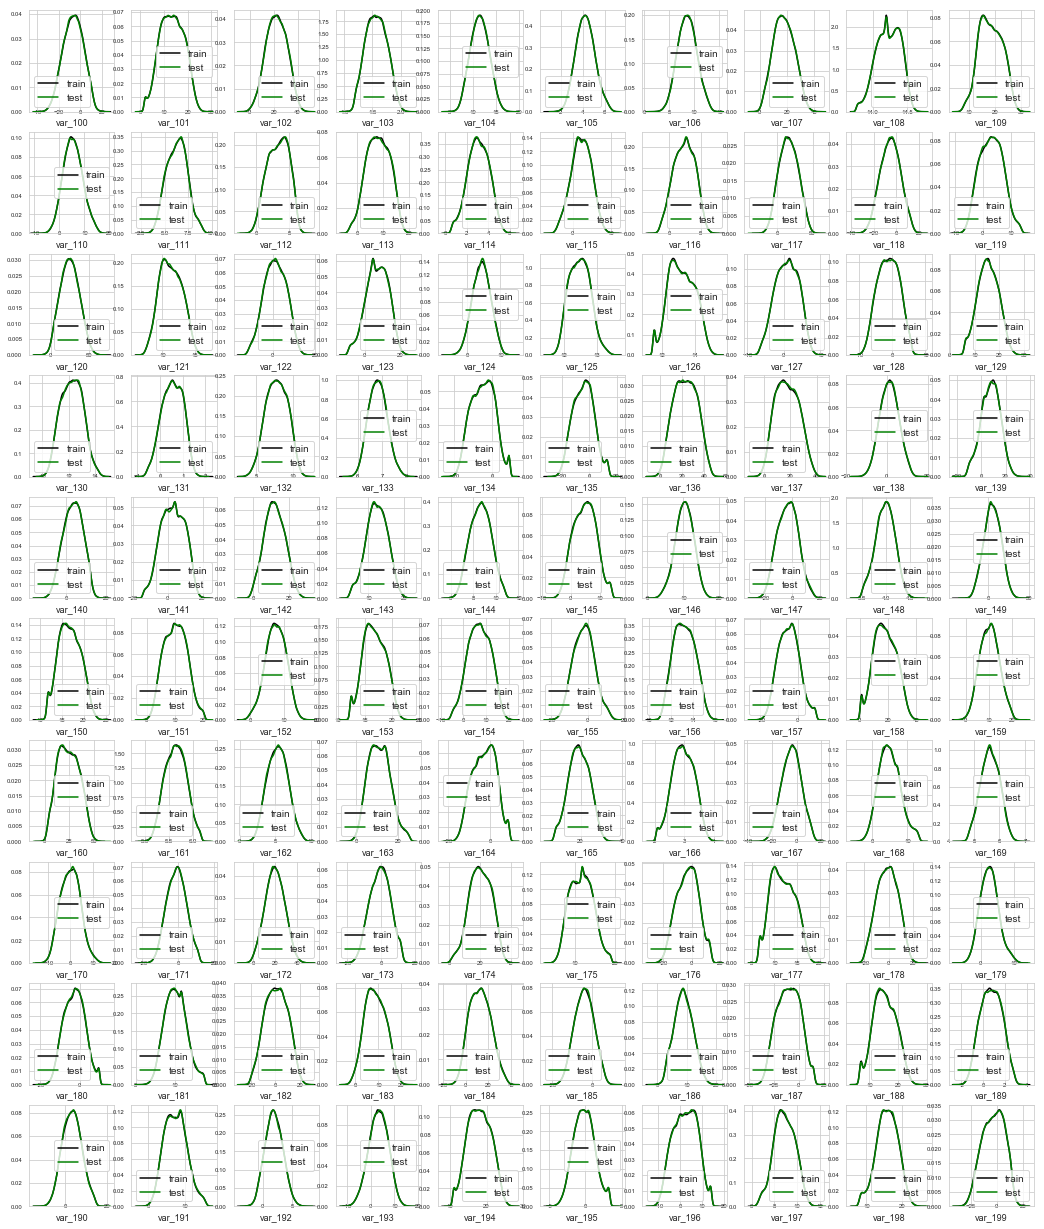

In [48]:
variables = train.columns.values[102:202]
distribucion(train, test, 'train', 'test', variables)

In [50]:
#Al analizar las variables encontramos que no hay diferencia entre la base de test y entrenamiento. 
#A continuacion estudiaremos las correlaciones altas entre un par de variables eso tambien da indicios para tomar
#decisiones de que variables entran o no en el modelo, a continuacion las 10 más altas
variables=train.columns.values[2:202]
correlaciones = train[variables].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlaciones = correlaciones[correlaciones['level_0'] != correlaciones['level_1']]
correlaciones.tail(10)

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


In [18]:
#En conclusion, las correlaciones entre variables son bastante pequeñas.
#Modelo 1
#Importar Librerías
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [21]:
#Como no hay valores perdidos proveemos a crear el vector de variables y la variable objetivo
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']

In [23]:
#Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(train[features], target, test_size=.4)

In [25]:
#Comprobamos el tamaño de las diferentes muestras (pred=predictora; tar=target, objetivo). La salida en cada caso es una pareja de datos: el tamaño de la muestra y el número de variables
[pred_train.shape,pred_test.shape,tar_train.shape,tar_test.shape]

[(120000, 200), (80000, 200), (120000,), (80000,)]

In [26]:
#Construimos el árbol con los datos de entrenamiento
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [27]:
#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

In [28]:
#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[65128,  6857],
       [ 6299,  1716]], dtype=int64)

In [29]:
#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
sklearn.metrics.accuracy_score(tar_test, predictions)

0.83555

In [ ]:
#El accuracy de este arbol da 0.8355

In [13]:
#Modelamiento
#Se utilizará el algoritmo de arbol de decision boosting gradient del paquete LightGBM
#Después de mucho tanteo se proponen los siguientes parametros
#Cargar las librerias
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [14]:
#Modelo2
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.89904	valid_1's auc: 0.880364
[2000]	training's auc: 0.911204	valid_1's auc: 0.888868
[3000]	training's auc: 0.91903	valid_1's auc: 0.893151
[4000]	training's auc: 0.924854	valid_1's auc: 0.896012
[5000]	training's auc: 0.929701	valid_1's auc: 0.897714
[6000]	training's auc: 0.933934	valid_1's auc: 0.898494
[7000]	training's auc: 0.93786	valid_1's auc: 0.898994
[8000]	training's auc: 0.941613	valid_1's auc: 0.89928
[9000]	training's auc: 0.945152	valid_1's auc: 0.899671
[10000]	training's auc: 0.948466	valid_1's auc: 0.899878
[11000]	training's auc: 0.951758	valid_1's auc: 0.900177
[12000]	training's auc: 0.954863	valid_1's auc: 0.899992
[13000]	training's auc: 0.957793	valid_1's auc: 0.899881
[14000]	training's auc: 0.96065	valid_1's auc: 0.899628
Early stopping, best iteration is:
[11045]	training's auc: 0.951908	valid_1's auc: 0.900223
Fold 1
Training until validation scores don't improve

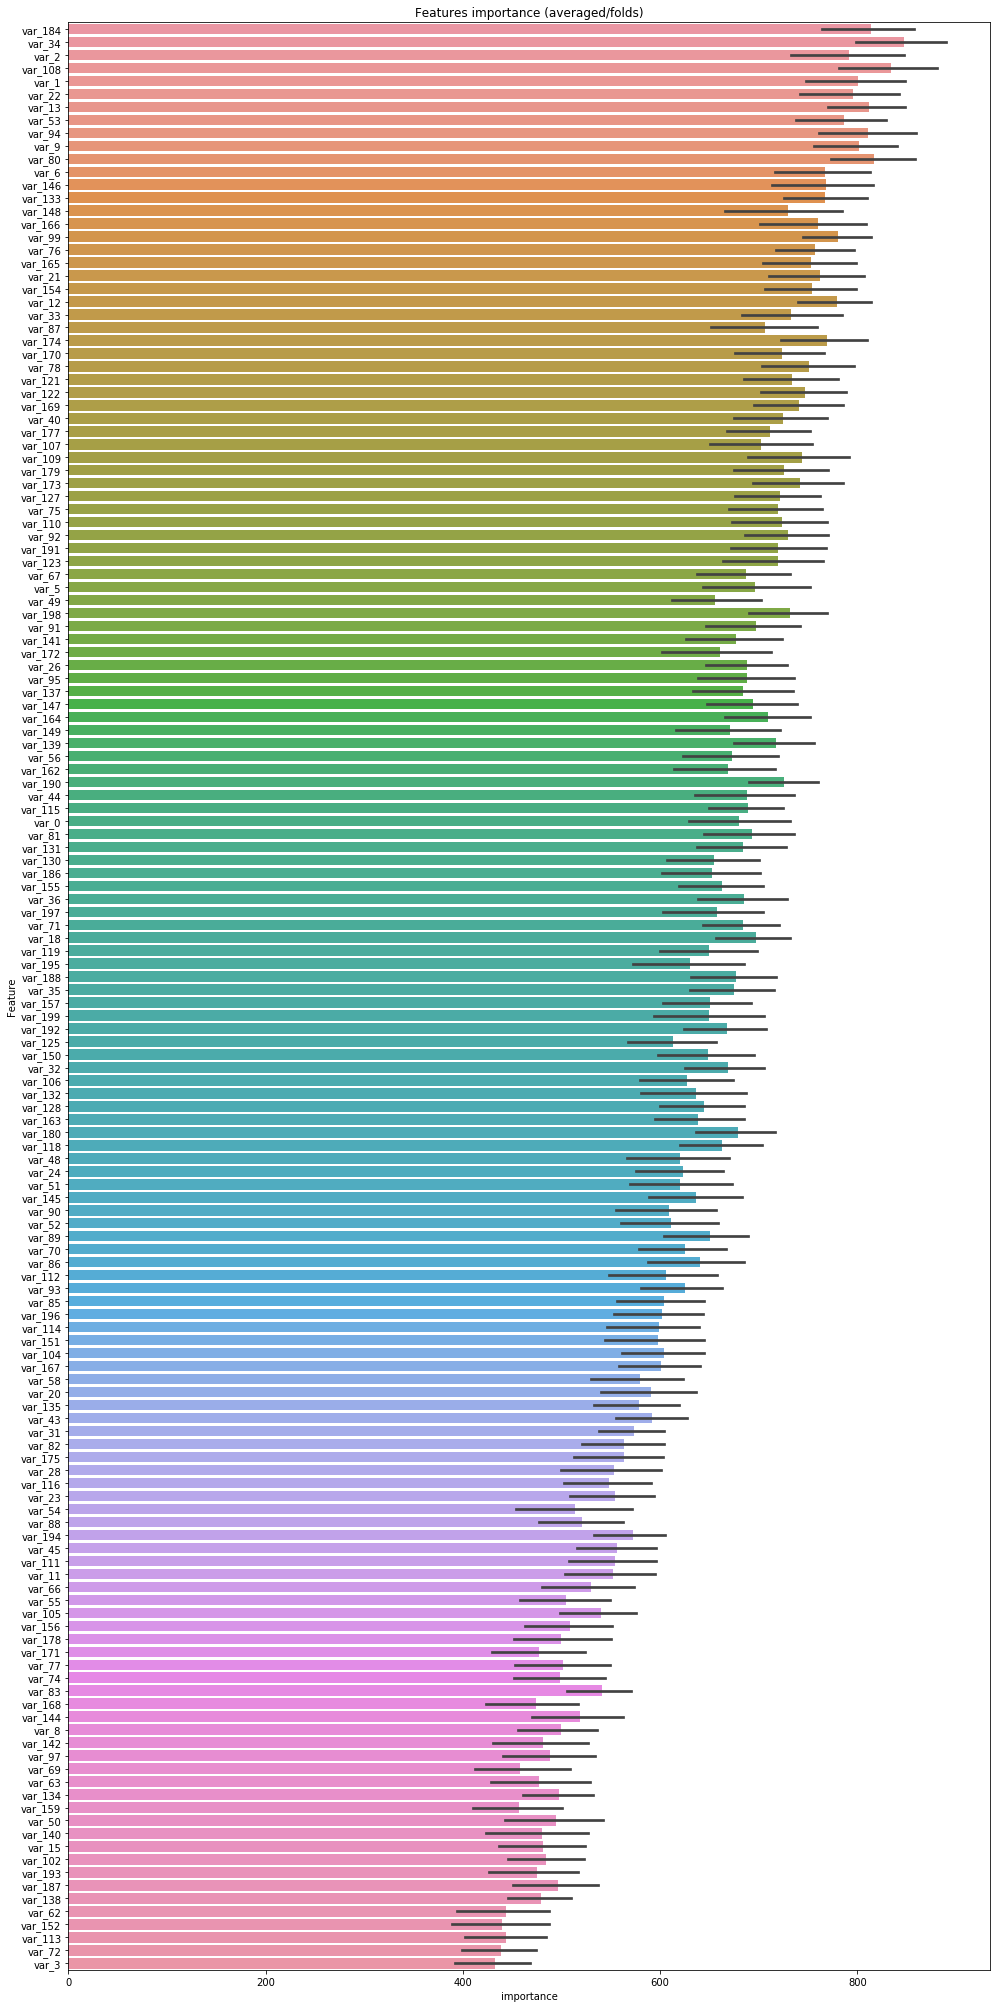

In [15]:
#Importancia de las variables en la prediccion
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [17]:
#Crear el documento
sub_df = pd.DataFrame({"ID_code":test["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("submission.csv", index=False)

In [ ]:
#De los dos modelos me quedaría con el arbol boosting del gradiente pues tiene mejor accuracy